# ** NESNE YERİ TESPİTİ: YOLO ** 


---

**Kaynak:[ YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/)**


---


[<img align="left" width="100" height="100" src="https://images.cdn2.stockunlimited.net/clipart/letter-a_1995332.jpg">](https://www.ayyucekizrak.com/)
[<img align="right" width="200" height="50"  src="https://raw.githubusercontent.com/deeplearningturkiye/pratik-derin-ogrenme-uygulamalari/944a247d404741ba37b9ef74de0716acff6fd4f9/images/dltr_logo.png">](https://deeplearningturkiye.com/)

## Kaynak Dosyalarını `github` üzerinden alma işlemleri

In [0]:
!git clone https://github.com/thtrieu/darkflow

Cloning into 'darkflow'...
remote: Counting objects: 2706, done.
remote: Total 2706 (delta 0), reused 0 (delta 0), pack-reused 2706
Receiving objects: 100% (2706/2706), 18.74 MiB | 39.65 MiB/s, done.
Resolving deltas: 100% (1783/1783), done.


**Dosya Konumlama Adımları...**

In [0]:
!ls

darkflow  datalab  drive  Graph


In [0]:
import os
os.chdir("darkflow")

In [0]:
!ls

cfg	  demo.gif  labels.txt	preview.png  sample_img  test
darkflow  flow	    LICENSE	README.md    setup.py


In [0]:
!ls cfg

coco.names	extraction.conv.cfg  tiny-yolo.cfg	v1    yolo.cfg
extraction.cfg	tiny-yolo-4c.cfg     tiny-yolo-voc.cfg	v1.1  yolo-voc.cfg


### Kütüphane Kurulumu

In [0]:
!pip3 install Cython h5py

    100% |████████████████████████████████| 3.4MB 11.4MB/s 


In [0]:
!python3 setup.py build_ext --inplace

Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
[3/3] Cythonizing darkflow/cython_utils/nms.pyx
running build_ext
building 'darkflow.cython_utils.nms' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/darkflow
creating build/temp.linux-x86_64-3.6/darkflow/cython_utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -Wstrict-prototypes -g -fdebug-prefix-map=/build/python3.6-sXpGnM/python3.6-3.6.3=. -specs=/usr/share/dpkg/no-pie-compile.specs -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I/usr/include/python3.6m -c darkflow/cython_utils/n

In [0]:
!pip3 install -e .

Obtaining file:///content/darkflow
  Running setup.py develop for darkflow


In [0]:
!mkdir bin

In [0]:
!wget https://pjreddie.com/media/files/yolo.weights -P bin/

--2018-05-25 16:54:39--  https://pjreddie.com/media/files/yolo.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘bin/yolo.weights’

yolo.weights        100%[===================>] 194.49M   106MB/s    in 1.8s    

2018-05-25 16:54:40 (106 MB/s) - ‘bin/yolo.weights’ saved [203934260/203934260]



In [0]:
!ls bin/

yolo.weights


## **UYGULAMA**

In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python


In [0]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

from keras.preprocessing import image

%config InlineBackend.figure_format = 'svg'

Using TensorFlow backend.


### Modelin Tanımlanması ve Çalıştırılması

In [0]:
options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolo.weights',
    'threshold': 0.3,
    'gpu': 0
}

tfnet = TFNet(options)


Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.02590203285217285s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
os.chdir("../")

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
darkflow  datalab  drive  Graph


In [0]:
os.chdir("darkflow")

In [0]:
!ls '../drive/YOLO_NesneYeriTespiti/images'

insan.jpg  istiklal.jpg


**Görüntüyü oku ve uygun boyutlara getir!**

In [0]:

test_image = '../drive/YOLO_NesneYeriTespiti/images/insan.jpg'
test_image2 = '../drive/YOLO_NesneYeriTespiti/images/istiklal.jpg'

img = cv2.imread(test_image, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


img.shape

(424, 640, 3)

**Seçilen görüntüyü ekrana yazdır!**

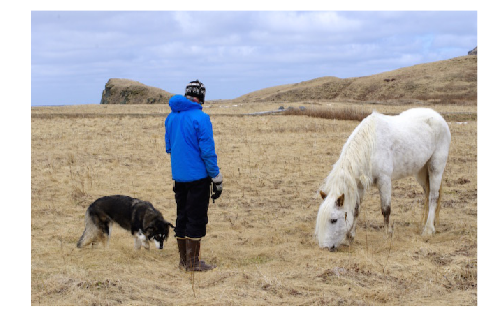

In [0]:
predicted_image = image.load_img(test_image)

plt.axis('off')
plt.imshow(predicted_image)
plt.show()

## Görüntüyü kestirmek için `YOLO` Kullan!

In [0]:
result = tfnet.return_predict(img)
result

[{'bottomright': {'x': 271, 'y': 375},
  'confidence': 0.833129,
  'label': 'person',
  'topleft': {'x': 187, 'y': 103}},
 {'bottomright': {'x': 205, 'y': 354},
  'confidence': 0.8508311,
  'label': 'dog',
  'topleft': {'x': 69, 'y': 259}},
 {'bottomright': {'x': 606, 'y': 352},
  'confidence': 0.8790006,
  'label': 'horse',
  'topleft': {'x': 397, 'y': 127}}]

**Etiket ve kutu belirleme işlemleri**

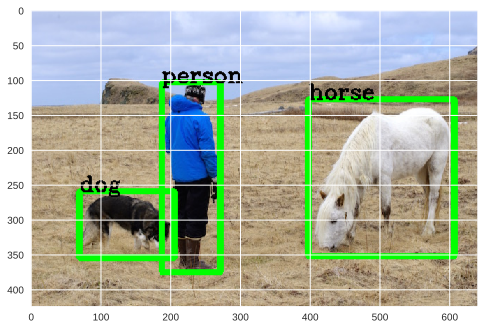

In [0]:


for r in result:
  tl = (r['topleft']['x'], r['topleft']['y'])
  br = (r['bottomright']['x'], r['bottomright']['y'])
  label = r['label']


  # görüntü üzerine kutuyu ekleme
  img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
  img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)

# Görüntüyü ekrana yazdırma
plt.imshow(img)
plt.show()